In [3]:
import cv2
import torch
import numpy as np
import torchsummary

from matplotlib import pyplot as plt
import segmentation_models_pytorch as smp
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader


In [4]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [251]:
train_image_path = '/home/zephyr/Desktop/Newcastle_University/11_FP_D/Dataset/Dataset/1.training/1.training/436219-7159-48057-[1, 0, 0].png'
valid_img_path = '/home/zephyr/Desktop/Newcastle_University/11_FP_D/Dataset/WSSS4LUAD/2.validation/2.validation/img/02.png'

In [252]:
train_image = cv2.resize(cv2.imread(train_image_path), (224, 224))
valid_image = cv2.resize(cv2.imread(valid_img_path), (224, 224))

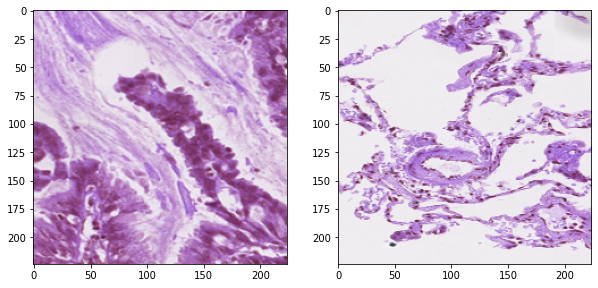

In [253]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 2, 1)
plt.imshow(train_image)

ax = fig.add_subplot(1, 2, 2)
plt.imshow(valid_image)

In [254]:
model_weights = ['/home/zephyr/Desktop/Newcastle_University/11_FP_D/Models/' + x for x in os.listdir('/home/zephyr/Desktop/Newcastle_University/11_FP_D/Models') if 'deeplab' in x and '50' in x]
model_weights.sort()
model_weights

['/home/zephyr/Desktop/Newcastle_University/11_FP_D/Models/deeplabv3plus_dice_resnet50_01.pth',
 '/home/zephyr/Desktop/Newcastle_University/11_FP_D/Models/deeplabv3plus_dice_resnet50_02.pth',
 '/home/zephyr/Desktop/Newcastle_University/11_FP_D/Models/deeplabv3plus_resnet50_01.pth',
 '/home/zephyr/Desktop/Newcastle_University/11_FP_D/Models/deeplabv3plus_resnet50_02.pth']

In [255]:
def preprocess_image(img: np.ndarray, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], resized = (224, 224)) -> torch.Tensor:
  
  preprocessing = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Resize((224, 224)),
                                      transforms.Normalize(mean, std),
                                      ])
  return preprocessing(img.copy()).unsqueeze(0)

In [256]:
train_image_tensor = preprocess_image(train_image)
valid_image_tensor = preprocess_image(valid_image)

In [257]:
model = smp.DeepLabV3Plus(encoder_name='resnet50', classes=3, activation=None, encoder_weights=None, ).to(device)

In [258]:
model.load_state_dict(torch.load(f=model_weights[2], map_location=device))

<All keys matched successfully>

In [259]:
model.eval()

DeepLabV3Plus(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequentia

In [260]:
train_out = model(train_image_tensor.to(device))
valid_out = model(valid_image_tensor.to(device))

In [261]:
t = torch.nn.functional.softmax(train_out, dim=1)

In [262]:
t = np.transpose(t.squeeze(0).cpu().detach().numpy(), (1, 2, 0))
t.shape

(224, 224, 3)

In [263]:
x = t > 0.5

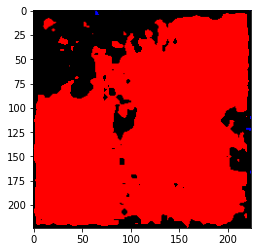

In [264]:
plt.imshow(x.astype(np.float32))

In [265]:
t = torch.nn.functional.softmax(valid_out, dim=1)

In [266]:
t = np.transpose(t.squeeze(0).cpu().detach().numpy(), (1, 2, 0))
t.shape

(224, 224, 3)

In [267]:
x = t > 0.5

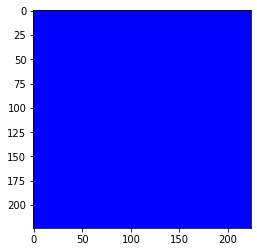

In [268]:
plt.imshow(x.astype(np.float32))